# Part 1

Цель сегодняшней практики - познакомиться с основными понятиями, такими как:

* tokenizer
* Word embedding
* word2vec

А так же, мы постараемся понять, зачем оно вообще нужно.

Для наглядности поиграемся с любимым всеми переводом Гарри Поттера от Спивак!

In [ ]:
import numpy as np

with open('garri-potter.txt', 'r') as f:
  full_text = f.read()

print(full_text[:55])

Гарри Поттер и философский камень 
Джоан Кэтлин Роулинг


Для начала было бы славно понять, с чем мы вообще работаем. Вот фрагмент текста:

In [ ]:
print(full_text[167:970])

Глава первая. Мальчик, который выжил
Мистер и миссис Дёрсли, проживающие в доме номер четыре по Привит Драйв, могли с гордостью заявить, что они-то уж, слава богу, совершенно нормальные. От них меньше всего можно было ожидать чего-то странного или загадочного, потому что они просто не выносили подобной чепухи.

Мистер Дёрсли был директором фирмы «Граннингс», которая занималась производством дрелей. Это был большой, крепкий мужчина, у которого почти полностью отсутствовала шея, зато были очень большие усы. Миссис Дёрсли была худой блондинкой с шеей почти в два раза длиннее обычной, что оказалось весьма кстати, поскольку она проводила очень много времени, заглядывая за заборы и шпионя за соседями. У Дёрсли был маленький сын по имени Дадли, и, по их мнению, на свете не было мальчика прекрасней.



In [ ]:
full_text = full_text[167:].replace('\xa0', ' ')

## Посмотрим на текст пристально

> *Первое правило NLP клуба - узнай врага в лицо.* 
>
> © Неизвестный мыслитель

Как и Неизвестный мыслитель, давайте тоже заедем хорошую привычку - прежде чем **что-либо** делать, мы будем смотреть на данные.

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt # plots

In [ ]:
word_cloud = WordCloud(width=600,height=400,
                       max_words=150, background_color="white",
                       collocations=False).generate(full_text)

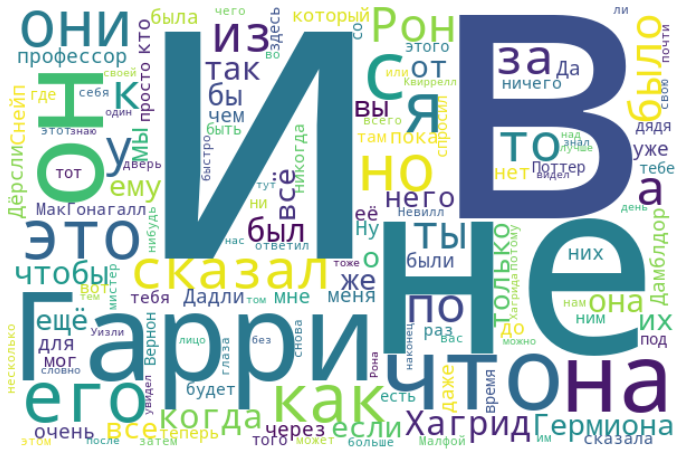

In [ ]:
plt.figure(figsize=(12,10));
plt.imshow(word_cloud, interpolation='bilinear');
plt.axis('off');

Не особо информативно, не так ли? Давайте уберем часто встречаемые предлоги, союзы и прочее.

Кстати говоря, это носит название `stopwords`

In [ ]:
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

russian_stopwords = stopwords.words("russian")

russian_stopwords[:13]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то']

In [ ]:
word_cloud = WordCloud(width=600,height=400, stopwords=russian_stopwords,
                       max_words=150, background_color="white",
                       collocations=False).generate(full_text)

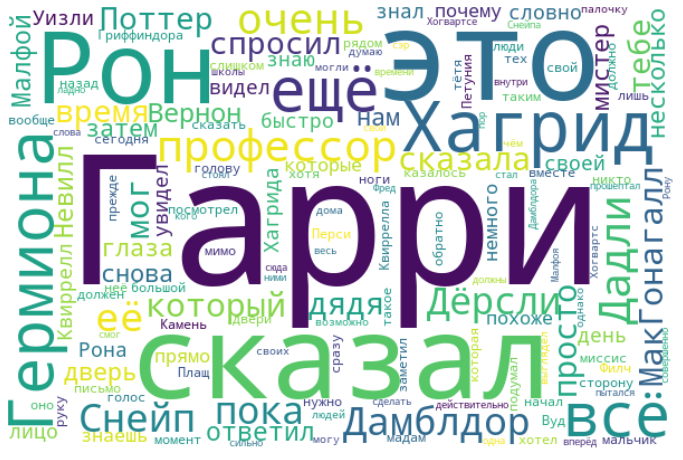

In [ ]:
plt.figure(figsize=(12,10));
plt.imshow(word_cloud, interpolation='bilinear');
plt.axis('off');

Всё ещё не очень хорошо. Что можно сделать ещё?

In [ ]:
russian_stopwords.append('это')
full_text = full_text.replace('ё', 'е')

In [ ]:
word_cloud = WordCloud(width=600,height=400, stopwords=russian_stopwords,
                       max_words=150, background_color="white",
                       collocations=False).generate(full_text)

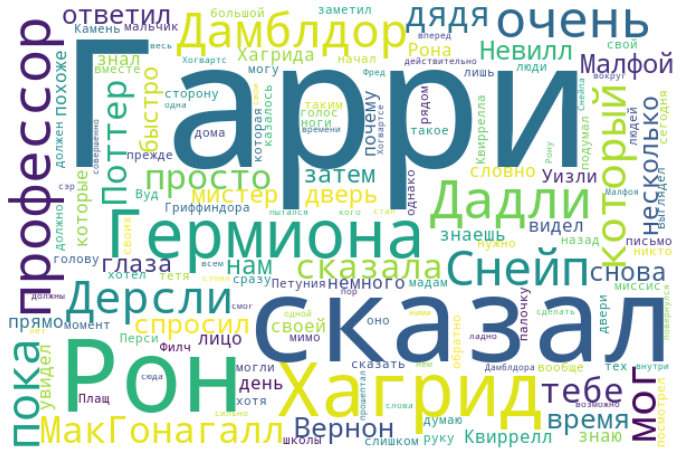

In [ ]:
plt.figure(figsize=(12,10));
plt.imshow(word_cloud, interpolation='bilinear');
plt.axis('off');

## Tokenizer

Начнем разговор с одного из базовых механизмов NLP - поговорим про `tokenizer`. 

Почти для любой задачи нужно вначале разбить предложение на слова. Простой `str.split()` использовать не получится -- нам важна пунктуация, смайлики и всё такое.

Например, есть два предложения: 

`Привет, Антон, как у тебя дела? Чем собираешься заняться сегодня вечером 👉👈😳?`

Надо привести их в вид с которым дальше будет удобно работать:

`Привет , Антон , как у тебя дела ? Чем собираешься заняться сегодня вечером 👉👈😳? `

Вот теперь можно использовать `.split()`, однако токенайзеры и так обычно возвращают список слов. 

Мы будем использовать __`nltk`__ -- библиотеку, которая умеет делать многие nlp задачи, такие как токенизация, выделение частей речи и прочие.

In [ ]:
from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()

print(tokenizer.tokenize('Привет, Антон, как у тебя дела? Чем собираешься заняться сегодня вечером 👉👈😳?'))

['Привет', ',', 'Антон', ',', 'как', 'у', 'тебя', 'дела', '?', 'Чем', 'собираешься', 'заняться', 'сегодня', 'вечером', '👉👈😳?']


Теперь мы можем разделить стандартные предложения на токены - а значит можем приступать к следующему шагу!

## Word Embedding

Как мы помним, произведя некоторые умные действия, можно сопоставить каждому слову некоторый вектор из `n` чисел так, что у каждого слова будет уникальный вектор. 

Зачем это делать? Все просто - с числами, и даже с векторами чисел работать куда проще, чем со словами.

Поскольку для любой модели важен контекст, нужно как-то его предоставить. Очень круто, если моделька поймет, что речь идет о Гарри Поттере, но... скорее всего она не поймет. Не сейчас :)

Поэтому давайте дадим ей возможность научиться правильно понимать предложения - а значит и контекст будем давать в предложениях.

Итак, наша цель - получить текст, разбитый на предложения. Давайте сделаем это!

In [ ]:
# Необходимо записать в переменную sentences все предложения из full_text
# Для этого давайте считать, что помимо стандартных способо разделения предложений (включая …), 
# они могут быть разделены символом '\n' - это символ переноса строки.
# TODO
sentences = ...

In [ ]:
assert len(sentences) == 7726, 'Неправильное общее количество предложений'
assert sentences[150] == ' Вместо этого он сказал самым обычным тоном, каким смог:', 'Неправильно делятся предложения'
assert len(tokenizer.tokenize(sentences[106])) == 25, 'Неправильно работает tokenize'

Итак, почти все готово, чтобы векторизовать текст. Поэтому, почему бы не приступить?

## word2vec

Отличная документация(статья на хабре) про [word2vec](https://habr.com/ru/post/446530/), вдруг интересно будет :)

На самом деле, все нужные преобразования делает питон, а точнее некоторые библиотеки. Наш план такой:

1. Необходимо токенизировать каждое из предложений, (Почему? Ответ в предыдущем пункте)

 Как итог, у вас получится "список списков токенов" - именно он нам будет нужен, чтобы работать с `word2vec` моделью.

 **Учтите, что предложения, которые "обнулятся" после токенизации, нам не нужны.**

2. Теперь нам понадобится Word2Vec из библиотеки gensim (импорты уже настроены) - почитайте о методах ее работы [тут](https://radimrehurek.com/gensim/models/word2vec.html). Нам потребуется модель, которая каждому слову сопоставляет вектор длины `2`.

 p.s. вам достаточно пункта `Usage examples`

3. Визуализируем полученные данные. Для этого нужно создать матрицу размера `(len(words), 2)` - `i` строка задает вектор для `i` слова из списка `words`. После этого, для грамотного отображения, нужен следующий трюк - нормализация. Для этого:
 
 1. Вычтите из каждого значения среднее значение по столбцу (то есть из каждого `x` вычтите среднее всех `x`).
 2. Поделите каждое значение на `std` (стандартное отклонение - есть в numpy) этого столбца. 

### 1 - Токенизация предложений

In [ ]:
# TODO

prepared_text = ...

In [ ]:
assert type(prepared_text[0]) == list, 'Токинизация отсутствует'
assert len(prepared_text) == 7726, 'Не убраны "пустые" предложения'

### 2 - word2vec

In [ ]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

# TODO
model = ...

In [ ]:
model.wv.get_vector('гарри')

array([ 1.024264  , -0.02665476,  0.3389827 , -0.20410296, -0.31134295,
       -0.13750191,  0.05649091,  1.4196278 , -0.1955113 ,  0.4884722 ,
        0.4400857 ,  0.12541285,  0.60643286, -0.01730855, -0.7201749 ,
        0.08077905, -0.22516723, -0.377871  ,  0.56603855, -0.9363515 ,
        0.20088136, -1.0038471 , -0.06807216, -0.09460365,  0.4486069 ,
        0.23251781,  0.19228083, -0.17583348, -0.5313243 ,  0.34227568,
        0.354558  ,  0.33266473, -0.2924572 ,  1.1389292 , -0.5084744 ,
        0.3787485 ,  0.38112953, -0.2510592 ,  0.41216102, -0.46367168,
       -0.01470801, -0.35872775,  0.5828525 ,  0.1170013 , -0.37532955,
        0.2580695 , -0.13496388, -0.07882152,  0.0398609 , -0.9623419 ,
        0.38887382,  1.065491  , -0.456247  , -0.8823563 , -0.5875432 ,
       -0.01003278, -0.6937243 ,  0.47424927,  0.29358083,  0.09731034,
        0.21931481,  0.04784218, -0.291704  , -0.26468837], dtype=float32)

In [ ]:
model.wv.most_similar('гарри')

[('он', 0.9996790289878845),
 ('гермиона', 0.9996345639228821),
 ('наконец', 0.9996082782745361),
 ('но', 0.9996006488800049),
 ('хагрид', 0.9995979070663452),
 ('она', 0.9995545744895935),
 ('его', 0.9995434880256653),
 ('же', 0.9995219707489014),
 ('как', 0.9995062351226807),
 ('невилл', 0.9995040893554688)]

In [ ]:
words = list(model.wv.vocab)

assert len(words) == 1873, 'Неправильное общее количество слов'

### 3 - визуализация

In [ ]:
# TODO

def normalize_matrix(matrix):
  #TODO
  return new_matrix


words_matrix = normalize_matrix(...)

<ipython-input-22-4054923683e4>:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  words_matrix = np.array([model[word] for word in words])


In [ ]:
assert words_matrix.shape == (len(words), 2)
assert max(abs(words_matrix.mean(0))) < 1e-5, "points must be zero-centered"
assert max(abs(1.0 - words_matrix.std(0))) < 1e-2, "points must have unit variance"

In [ ]:
import bokeh.models as bm, bokeh.plotting as pl
from bokeh.io import output_notebook
output_notebook()

def draw_vectors(x, y, radius=10, alpha=0.25, color='blue',
                 width=600, height=400, show=True, **kwargs):
    """ draws an interactive plot for data points with auxilirary info on hover """
    if isinstance(color, str): color = [color] * len(x)
    data_source = bm.ColumnDataSource({ 'x' : x, 'y' : y, 'color': color, **kwargs })

    fig = pl.figure(active_scroll='wheel_zoom', width=width, height=height)
    fig.scatter('x', 'y', size=radius, color='color', alpha=alpha, source=data_source)

    fig.add_tools(bm.HoverTool(tooltips=[(key, "@" + key) for key in kwargs.keys()]))
    if show: pl.show(fig)
    return fig

In [ ]:
draw_vectors(words_matrix[:, 0], words_matrix[:, 1], token=words)

Figure(id='1003', ...)

Интересно, неправда ли? 

Отлично видно выброс - токен `*`, с ним даже вопросов нет. Но почему все остальные токены оказались так близки друг к другу?

\# Может, несколько мыслей?

\# TODO

### Пример получше

Нетрудно понять, что с нашим датасетом тут делать нечего - надо смотреть на что-то более практически применимое.

Посмотрим на датасет сообщений из твиттера:

In [ ]:
import gensim.downloader as api
model2 = api.load('glove-twitter-100')

In [ ]:
model2.most_similar(positive=["coder", "money"], negative=["brain"])

[('broker', 0.5820155739784241),
 ('bonuses', 0.5424473285675049),
 ('banker', 0.538511335849762),
 ('designer', 0.5197198390960693),
 ('merchandising', 0.4964233934879303),
 ('treet', 0.49220192432403564),
 ('shopper', 0.4920561909675598),
 ('part-time', 0.49128279089927673),
 ('freelance', 0.4843311905860901),
 ('aupair', 0.4796452522277832)]

In [ ]:
words = sorted(model2.vocab.keys(), 
               key=lambda word: model2.vocab[word].count,
               reverse=True)[:1000]

print(words[::100])

['<user>', '_', 'please', 'apa', 'justin', 'text', 'hari', 'playing', 'once', 'sei']


In [ ]:
word_vectors = np.array([model2.get_vector(x) for x in words])

In [ ]:
from sklearn.decomposition import PCA

words_pca = PCA(n_components=2)
word_vectors_pca = words_pca.fit_transform(word_vectors)

word_vectors_pca = (word_vectors_pca - word_vectors_pca.mean(0)) / word_vectors_pca.std(0)

In [ ]:
import bokeh.models as bm, bokeh.plotting as pl
from bokeh.io import output_notebook
output_notebook()

def draw_vectors(x, y, radius=10, alpha=0.25, color='blue',
                 width=600, height=400, show=True, **kwargs):
    """ draws an interactive plot for data points with auxilirary info on hover """
    if isinstance(color, str): color = [color] * len(x)
    data_source = bm.ColumnDataSource({ 'x' : x, 'y' : y, 'color': color, **kwargs })

    fig = pl.figure(active_scroll='wheel_zoom', width=width, height=height)
    fig.scatter('x', 'y', size=radius, color='color', alpha=alpha, source=data_source)

    fig.add_tools(bm.HoverTool(tooltips=[(key, "@" + key) for key in kwargs.keys()]))
    if show: pl.show(fig)
    return fig

In [ ]:
draw_vectors(word_vectors_pca[:, 0], word_vectors_pca[:, 1], token=words)

Figure(id='1112', ...)

Тут уже дела обстоят куда лучше (хоть с первого взгляда и не скажешь). 

## Extra

Раз уж мы разобрались, какой датасет нужен, посмотрели даже на хороший датасет, и эмбеддинги, полученные на его основе, давайте займемся чем-то более интересным.

Например, на основе `model2` научимся определять пол для имен на русском языке (да-да, там есть слова на русском).

In [ ]:
model2.wv.most_similar('привет')

<ipython-input-52-a54fe6b427ab>:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  model2.wv.most_similar('привет')


[('спасибо', 0.7789546251296997),
 ('всем', 0.7179253101348877),
 ('чувак', 0.7046979069709778),
 ('тебе', 0.7018572092056274),
 ('кстати', 0.6974592208862305),
 ('здравствуй', 0.6853662729263306),
 ('лента', 0.6808487176895142),
 ('доброе', 0.6759792566299438),
 ('ну', 0.6729848384857178),
 ('добрый', 0.6715476512908936)]

In [ ]:
import pandas as pd

df = pd.read_csv('names.csv')

df.head()

,name,sex
0,Джек,м
1,Джон,м
2,Джесси,ж
3,Маша,ж
4,Гарри,м


Задача следующая - для каждого слова из `df` нужно определить его вектор в `model2` (если он есть), а потом обучить на этих векторах классификатор (или что-то другое). Как итог - он должен предсказывать пол человека по имени.

*hint*: для начала ознакомьтесь с [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

*hint2*: если очень хочется разобраться, но не получается - смело пишите преподавателям!